In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [397]:
### import datasets
X_test= pd.read_csv("X_test.csv",header=None)
X = pd.read_csv("X_train.csv",header=None)
y_test=pd.read_csv("y_test.csv",header=None)
y=pd.read_csv("y_train.csv",header=None)
### Transposes and Identity Matrix to be used later
XT = np.transpose(X)
X_testT = np.transpose(X_test)
XTX = np.dot(XT,X)
XTy= np.dot(XT,y)
I=np.identity(7)

In [545]:
### function that calculates coefficients given lamda
def ridgeregression(lamda):

    return np.dot(np.linalg.inv(np.dot(lamda,I) + XTX),XTy)

wrr=np.empty([0,7])
### for loop that creates a table for lambda from 0 to 5000
for x in range(0,5001):
    wrr = np.vstack([wrr, np.transpose(ridgeregression(x))])
    
wRR = pd.DataFrame(data=wrr,columns=('A','B','C','D','E','F','G'))

In [399]:

### df lamda without SVD
def dflamda(lamda):
    XTXpluslamdaI = np.add(XTX, np.dot(lamda,I))
    XTXpluslamdaIinverse = np.linalg.inv(XTXpluslamdaI)
    XXTXpluslamdaIinverse = np.dot(X,XTXpluslamdaIinverse) 
    XXTXpluslamdaIinverseXT= np.dot(XXTXpluslamdaIinverse,XT) 
                         
    return np.trace(XXTXpluslamdaIinverseXT)

DF=np.empty([0,1])
### for loop for creating DF table
for x in range(0,5001):    
    DF= np.vstack([DF,dflamda(x)])


In [522]:
### finding w using SVD
lamda=1
U, s, V = np.linalg.svd(X,full_matrices=0)
UT=np.transpose(U)
VT=np.transpose(V)
s=np.diag(s)
s2=np.linalg.matrix_power(s,2)
s2l=np.add(lamda,s2)
slamdainv = np.divide(s, s2l)
slamdainv=np.nan_to_num(slamdainv)

wRR.columns.names=('A')

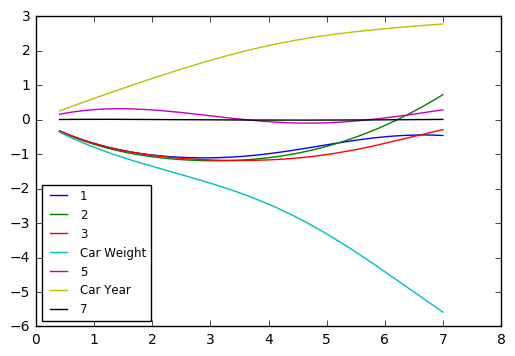

In [544]:
plt.plot(DF,wRR,label=wRR.columns.values)
plt.legend(['1','2','3','Car Weight','5','Car Year','7'],loc='lower left',fontsize=8.5)
plt.show()


In [515]:
### Predictions
yprediction = np.dot(X_test,np.transpose(wrr[:51]))
ypred = pd.DataFrame(data=yprediction)
i=1
yt= y_test
for i in range(1,51):
    yt = np.hstack([yt, y_test])
    i=i+1
yt = pd.DataFrame(data=yt)

In [423]:
### RMSE
dif = ypred-yt
squared= np.power(dif,2)
sumsquared=np.sum(squared,axis=0)

RMSE=np.sqrt(sumsquared/42)

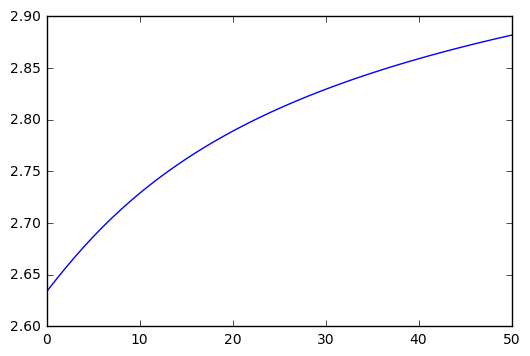

In [424]:
plt.plot(RMSE)
plt.show()

In [454]:
###pth order polynomial
X2=np.power(X,2)
X2.columns=('a','b','c','d','e','f','g')
X2=X2.drop('g',1)
X3=np.power(X,3)
X3.columns=('a','b','c','d','e','f','g')
X3=X3.drop('g',1)

XX2=pd.DataFrame(np.concatenate((X2,X),axis=1))

XX2T=np.transpose(XX2)
XX2Ty= np.dot(XX2T,y)
XX2TXX2 = np.dot(XX2T,XX2)
IX2=np.identity(13)

def ridgeregressionp2(lamda):

    return np.dot(np.linalg.inv(np.dot(lamda,IX2) + XX2TXX2),XX2Ty)

wrrp2=np.empty([0,13])
for x in range(0,501):
    wrrp2 = np.vstack([wrrp2, np.transpose(ridgeregressionp2(x))])

wRRp2 = pd.DataFrame(data=wrrp2,columns=("x6^2","x5^2","x4^2","x3^2","x2^2","x1^2","x6","x5","x4","x3","x2","x1","x0"))



In [426]:
XX2X3=pd.DataFrame(np.concatenate((X3,X2,X),axis=1))

XX2X3T=np.transpose(XX2X3)
XX2X3Ty= np.dot(XX2X3T,y)
XX2X3TXX2X3 = np.dot(XX2X3T,XX2X3)
IX2X3=np.identity(19)

def ridgeregressionp3(lamda):

    return np.dot(np.linalg.inv(np.dot(lamda,IX2X3) + XX2X3TXX2X3),XX2X3Ty)

wrrp3=np.empty([0,19])

for x in range(0,501):
    wrrp3 = np.vstack([wrrp3, np.transpose(ridgeregressionp3(x))])

wRRp3 = pd.DataFrame(data=wrrp3,columns=("X6^3","X5^3","X4^3","X3^3","X2^3","X1^3","x6^2","x5^2","x4^2","x3^2","x2^2","x1^2","x6","x5","x4","x3","x2","x1","x0"))


### create a matrix of real y values to substract from y predicitons
yt= y_test
for i in range(1,501):
    yt = np.hstack([yt, y_test])
    i=i+1
ytp2 = pd.DataFrame(data=yt)
ytp3 = pd.DataFrame(data=yt)

In [431]:
### RMSE for p=1

ypredp1 = pd.DataFrame(np.dot(X_test,np.transpose(wrr[:501])))

difp1 = ypredp1-yt
squaredp1= np.power(difp1,2)
sumsquaredp1=np.sum(squaredp1,axis=0)

RMSEp1=np.sqrt(sumsquaredp1/42)

In [484]:
### RMSE for p=2
X2test2= np.power(X_test.drop(X_test.columns[[-1]],axis=1),2)
X2test= pd.DataFrame(np.concatenate((X2test2,X_test),1))



ypredictionP2 = np.dot(Dum3,np.transpose(wRRp2[:501]))
ypredp2 = pd.DataFrame(data=ypredictionP2)

difp2 = ypredp2-ytp2
squaredp2= np.power(difp2,2)
sumsquaredp2=np.sum(squaredp2,axis=0)

RMSEp2=np.sqrt(sumsquaredp2/42)

In [485]:
### RMSE for p=3
X3test2= np.power(X_test.drop(X_test.columns[[-1]],axis=1),2)
X3test3= np.power(X_test.drop(X_test.columns[[-1]],axis=1),3)


X3test= pd.DataFrame(np.concatenate((X3test3,X3test2,X_test),1))


ypredp3 = pd.DataFrame(np.dot(X3test,np.transpose(wRRp3[:501])))

difp3 = ypredp3-ytp3
squaredp3= np.power(difp3,2)
sumsquaredp3=np.sum(squaredp3,axis=0)

RMSEp3=np.sqrt(sumsquaredp3/42)

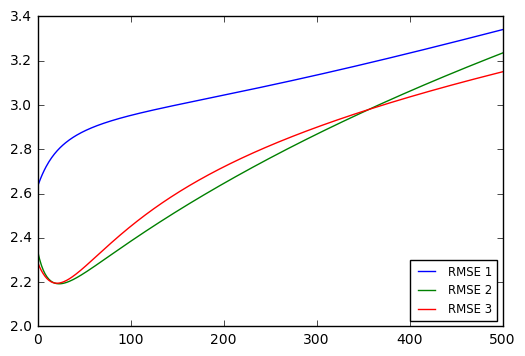

In [547]:

plt.plot(RMSEp1)
plt.plot(RMSEp2)
plt.plot(RMSEp3)
plt.legend(['RMSE 1','RMSE 2','RMSE 3'],loc='lower right',fontsize=8.5)
plt.show()
